<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here
missing_values_remotework = df['RemoteWork'].isnull().sum()
print(f"RemoteWork missing values: {missing_values_remotework}")

missing_values_jobsat = df['JobSat'].isnull().sum()
print(f"JobSat missing values: {missing_values_jobsat}")


RemoteWork missing values: 10631
JobSat missing values: 36311


In [5]:
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])
missing_values_remotework = df['RemoteWork'].isnull().sum()
print(f"RemoteWork missing values: {missing_values_remotework}")

RemoteWork missing values: 0


In [6]:
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].median())
missing_values_jobsat = df['JobSat'].isnull().sum()
print(f"JobSat missing values: {missing_values_jobsat}")

JobSat missing values: 0


In [7]:
df['JobSat']

0        7.0
1        7.0
2        7.0
3        7.0
4        7.0
        ... 
65432    7.0
65433    7.0
65434    7.0
65435    7.0
65436    7.0
Name: JobSat, Length: 65437, dtype: float64

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [8]:
# Convert YearsCodePro to numeric, forcing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Fill missing values with a default value (e.g., 0) or drop rows with missing values
df['YearsCodePro'] = df['YearsCodePro'].fillna(df['YearsCodePro'].mean())  # or df.dropna(subset=['YearsCodePro'], inplace=True)

# Check for remaining invalid values
print(df['YearsCodePro'].isnull().sum())

# Retry creating experience ranges
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], 
                                bins=[0, 5, 10, 20, float('inf')], 
                                labels=['0-5 years', '5-10 years', '10-20 years', '>20 years'])

# Calculate median JobSat for each range
experience_job_sat = df.groupby('ExperienceRange')['JobSat'].median()

# Display the results
print(experience_job_sat)

0
ExperienceRange
0-5 years      7.0
5-10 years     7.0
10-20 years    7.0
>20 years      7.0
Name: JobSat, dtype: float64


/tmp/ipykernel_781/3224172451.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  experience_job_sat = df.groupby('ExperienceRange')['JobSat'].median()


/tmp/ipykernel_83/2662032351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=experience_job_sat.index, y=experience_job_sat.values, palette='viridis')


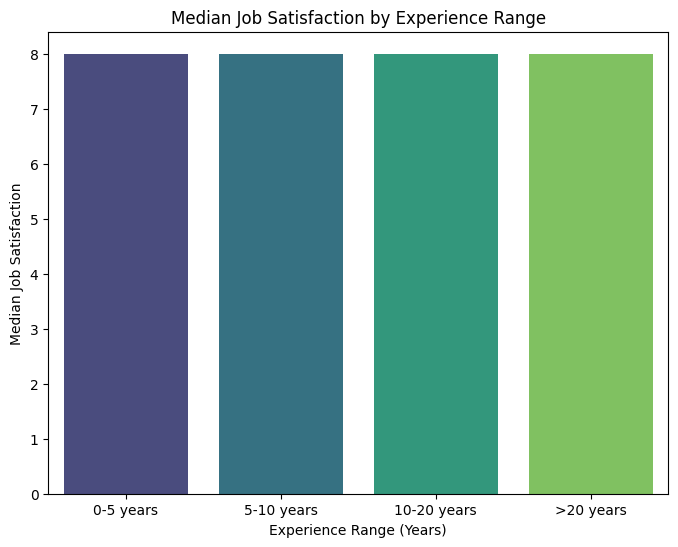

In [24]:
# Visualize with a bar plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x=experience_job_sat.index, y=experience_job_sat.values, palette='viridis')
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction')
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_781/1751852044.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', palette='coolwarm')


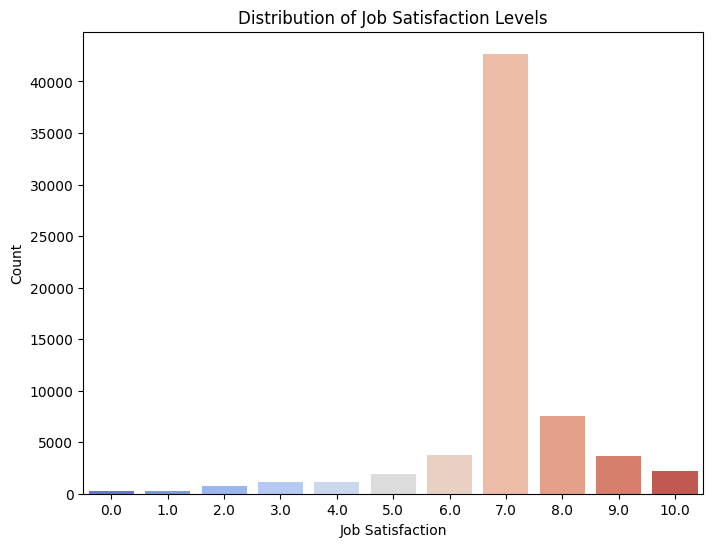

In [9]:
## Write your code here
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='JobSat', palette='coolwarm')
plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_781/876085637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', palette='Set2')


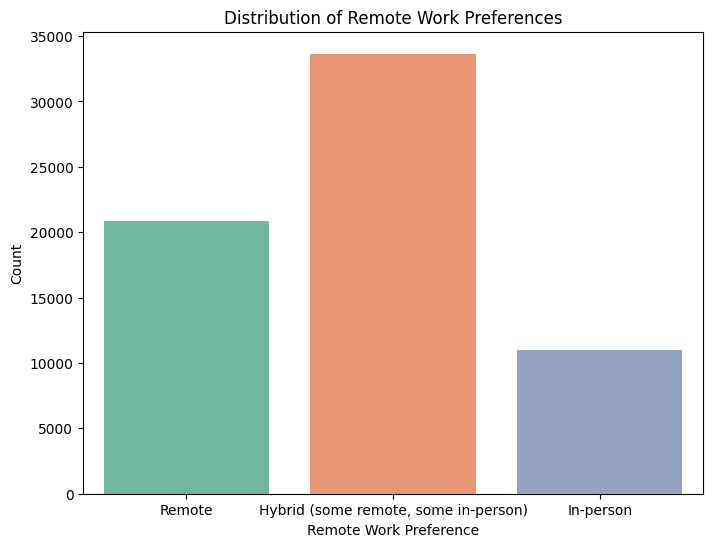

Employment                            Employed, full-time  \
RemoteWork                                                  
Hybrid (some remote, some in-person)                17296   
In-person                                            8552   
Remote                                              13193   

Employment                            Employed, full-time;Employed, part-time  \
RemoteWork                                                                      
Hybrid (some remote, some in-person)                                       85   
In-person                                                                  32   
Remote                                                                     95   

Employment                            Employed, full-time;Independent contractor, freelancer, or self-employed  \
RemoteWork                                                                                                       
Hybrid (some remote, some in-person)                        

In [10]:
## Write your code here
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RemoteWork', palette='Set2')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.show()

# Cross-tabulation: RemoteWork vs. Employment
remote_work_by_employment = pd.crosstab(df['RemoteWork'], df['Employment'])

print(remote_work_by_employment)

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


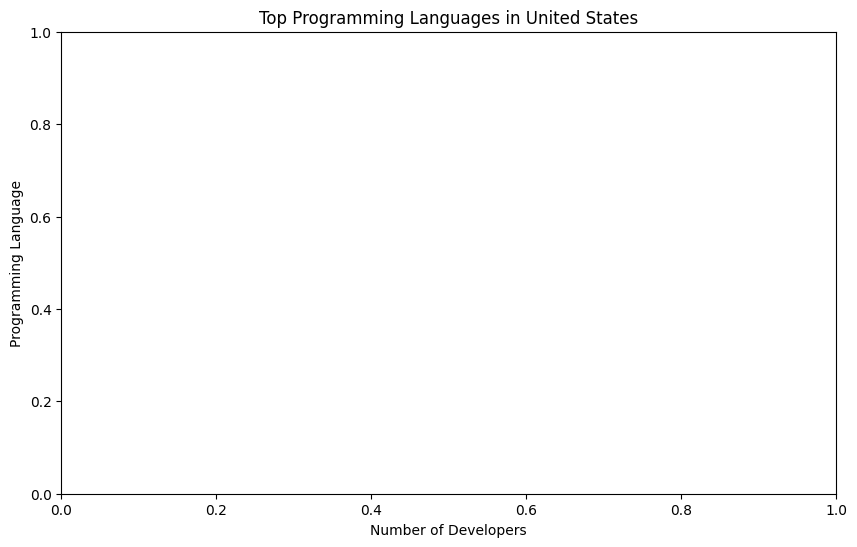

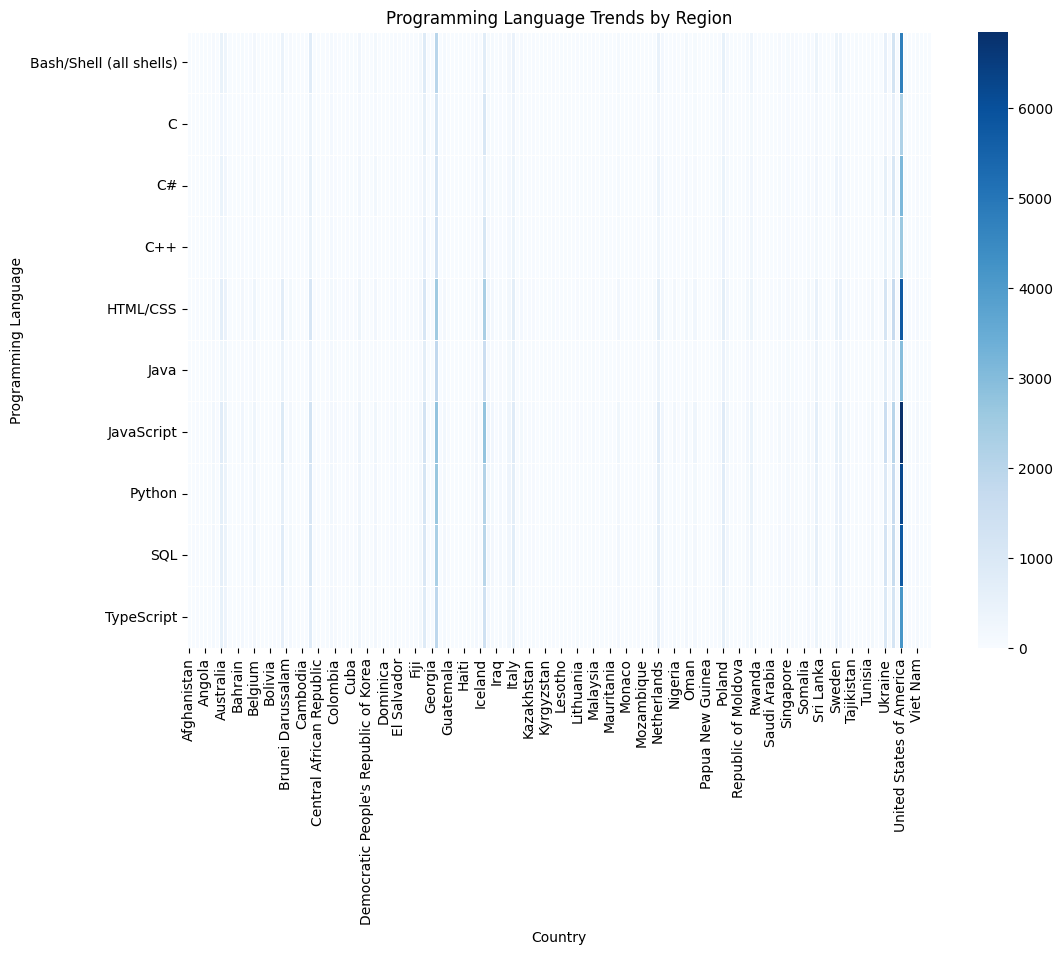

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data filtering
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].fillna('')  # Handle missing values
df_languages = df[['Country', 'LanguageHaveWorkedWith']]

# Split languages into individual rows
df_languages = df_languages.assign(Language=df_languages['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Count programming language usage per region
language_trends = df_languages.groupby(['Country', 'Language']).size().reset_index(name='Count')

# Focus on the top languages globally or for a specific region (e.g., "United States")
top_languages = language_trends.groupby('Language')['Count'].sum().nlargest(10).index
filtered_trends = language_trends[language_trends['Language'].isin(top_languages)]

# Visualize trends for a specific country
country = "United States"  # Change to any country/region of interest
filtered_country = filtered_trends[filtered_trends['Country'] == country]

plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_country, x='Count', y='Language', palette='viridis')
plt.title(f'Top Programming Languages in {country}')
plt.xlabel('Number of Developers')
plt.ylabel('Programming Language')
plt.show()

# Heatmap for top languages by region
heatmap_data = filtered_trends.pivot_table(values='Count', index='Language', columns='Country', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.5)
plt.title('Programming Language Trends by Region')
plt.xlabel('Country')
plt.ylabel('Programming Language')
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


Correlation between YearsCodePro and JobSatPoints_1: -0.03


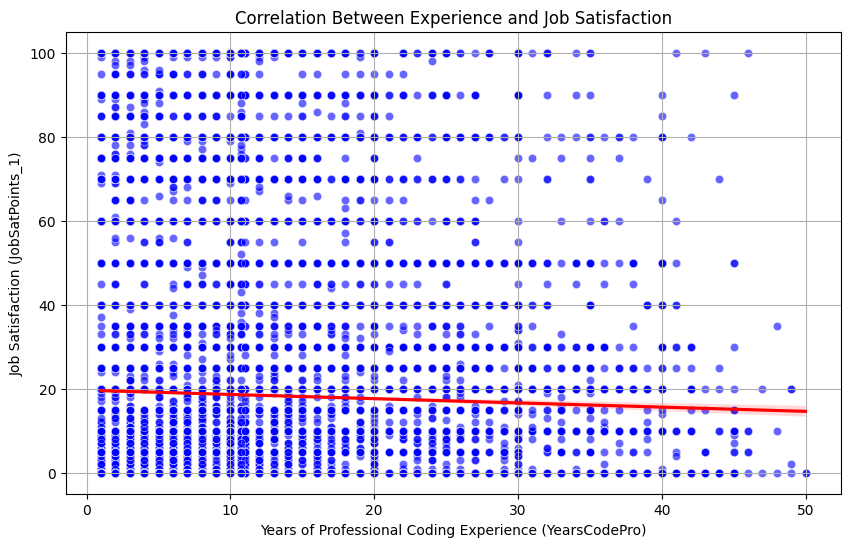

In [13]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert YearsCodePro to numeric and handle errors
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with missing values in the relevant columns
df_filtered = df[['YearsCodePro', 'JobSatPoints_1']].dropna()

# Calculate correlation
correlation = df_filtered['YearsCodePro'].corr(df_filtered['JobSatPoints_1'])
print(f"Correlation between YearsCodePro and JobSatPoints_1: {correlation:.2f}")

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='YearsCodePro', y='JobSatPoints_1', alpha=0.6, color='blue')

# Add regression line for better visualization
sns.regplot(data=df_filtered, x='YearsCodePro', y='JobSatPoints_1', scatter=False, color='red')

# Customize the plot
plt.title('Correlation Between Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience (YearsCodePro)')
plt.ylabel('Job Satisfaction (JobSatPoints_1)')
plt.grid(True)
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


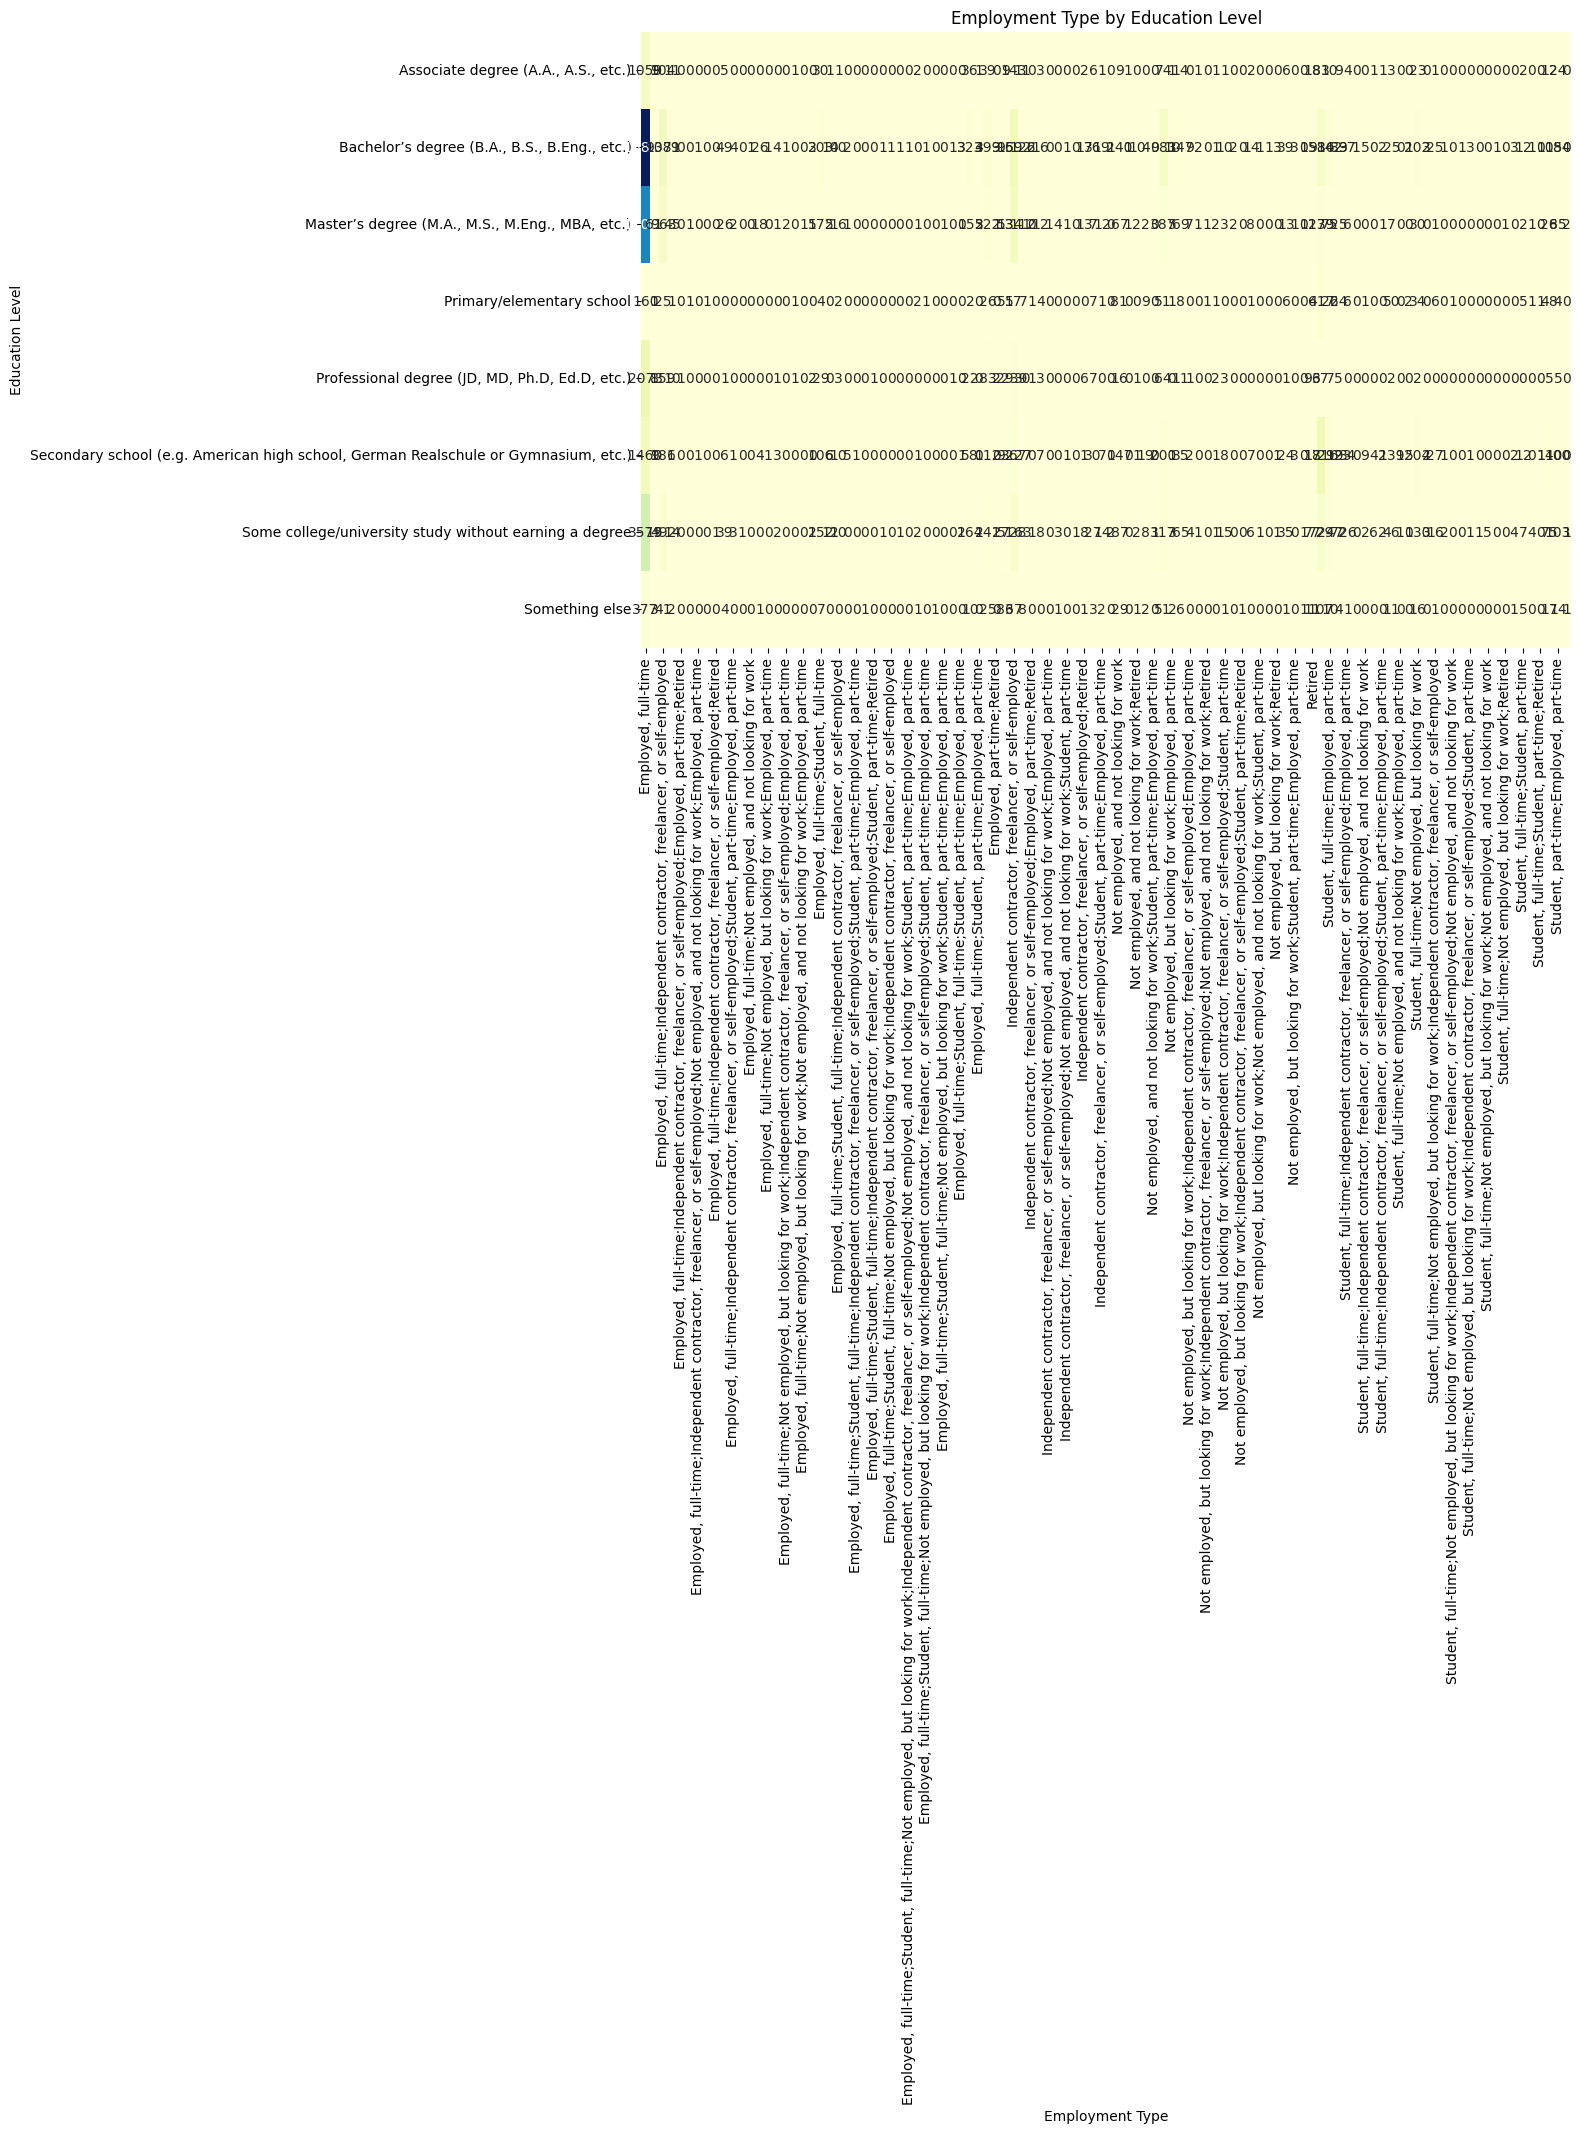

In [14]:
## Write your code here
# Cross-tabulation
education_employment = pd.crosstab(df['EdLevel'], df['Employment'])

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(education_employment, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Employment Type by Education Level')
plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [15]:
## Write your code here
# Save the modified dataset to a CSV file
df.to_csv('cleaned_analyzed_dataset.csv', index=False)
print("Dataset saved as 'cleaned_analyzed_dataset.csv'")


Dataset saved as 'cleaned_analyzed_dataset.csv'


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
